In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**PATH Set**

**Data Exploration and Analysis**

In [2]:
dirname = '/kaggle/input'
train_path = os.path.join(dirname, 'kermany2018/OCT2017 /train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'kermany2018/OCT2017 /test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'kermany2018/OCT2017 /val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [3]:
print(test_normal_pth)
print(train_drusen_pth)

/kaggle/input/kermany2018/OCT2017 /test/NORMAL
/kaggle/input/kermany2018/OCT2017 /train/DRUSEN


In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_imgs(item_dir, num_imgs=4):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(16, 16))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 4, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img, cmap='bone')

    plt.tight_layout()


**NORMAL**

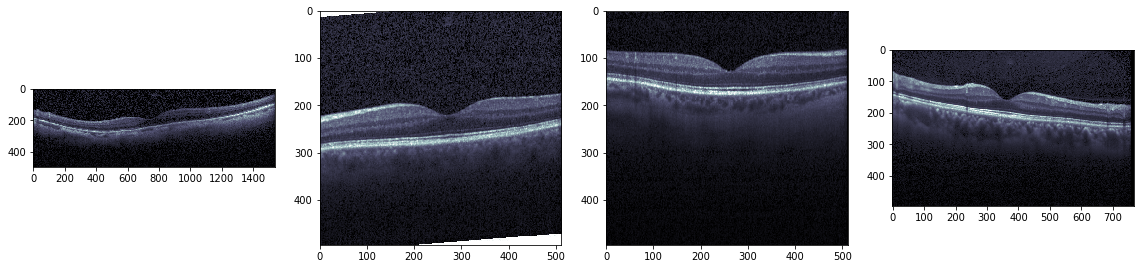

In [6]:
plot_imgs(train_normal_pth)

**DME**

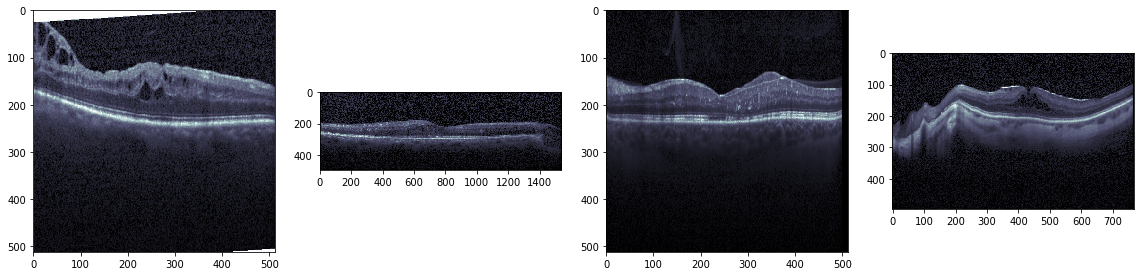

In [7]:
plot_imgs(train_dme_pth)

**DRUSEN**

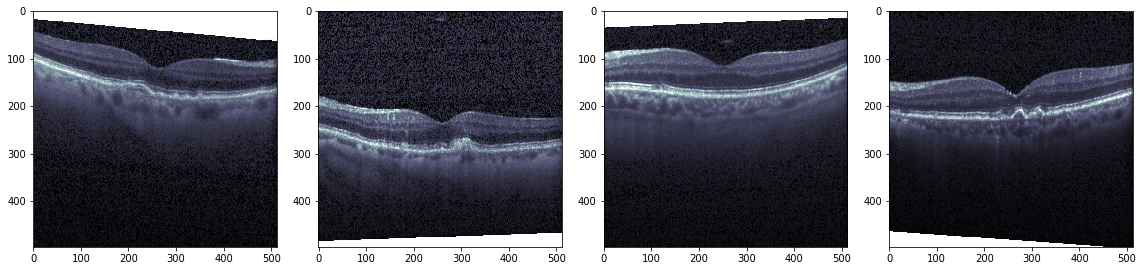

In [8]:
plot_imgs(train_drusen_pth)

**CNV**

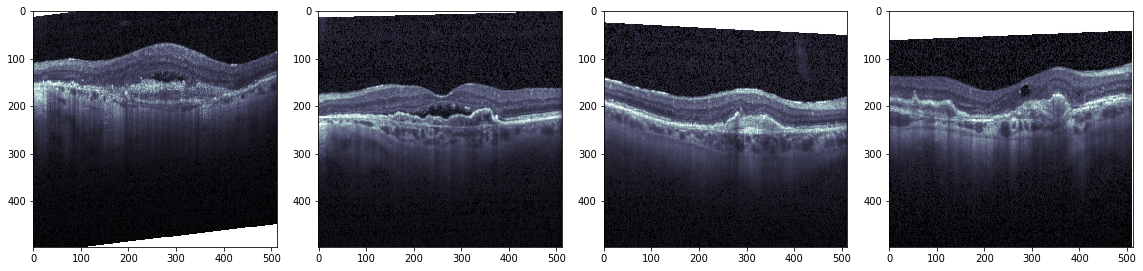

In [9]:
plot_imgs(train_cnv_pth)

**Detais about image dimensions**

In [10]:
import glob
from PIL import Image

In [11]:
def Images_details_Print_data(data, path):
    print(" ----->>>Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['min_height'] = min(height, data['min_height'])
        data['max_width'] = max(width, data['max_height'])
        
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

**TRAIN**

In [12]:
Images_details(train_normal_pth)
Images_details(train_dme_pth)
Images_details(train_drusen_pth)
Images_details(train_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/NORMAL
images_count:	26315
min_width:	384
max_width:	1536
min_height:	496
max_height:	512
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/DME
images_count:	11348
min_width:	512
max_width:	512
min_height:	496
max_height:	512
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/DRUSEN
images_count:	8616
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/CNV
images_count:	37205
min_width:	384
max_width:	1536
min_height:	496
max_height:	496


**TEST**

In [13]:
Images_details(test_normal_pth)
Images_details(test_dme_pth)
Images_details(test_drusen_pth)
Images_details(test_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/NORMAL
images_count:	242
min_width:	512
max_width:	768
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/DME
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/DRUSEN
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/CNV
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496


**Validation**

In [14]:
Images_details(val_normal_pth)
Images_details(val_dme_pth)
Images_details(val_drusen_pth)
Images_details(val_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/NORMAL
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/DME
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/DRUSEN
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/CNV
images_count:	8
min_width:	512
max_width:	768
min_height:	496
max_height:	496


In [15]:
input_path = "/kaggle/input/kermany2018/OCT2017 /"

for _set in ['train', 'test', 'val']:
    normal = len(os.listdir(input_path + _set + '/NORMAL'))
    dme = len(os.listdir(input_path + _set + '/DME'))
    drusen = len(os.listdir(input_path + _set + '/DRUSEN'))
    cnv = len(os.listdir(input_path + _set + '/CNV'))
    print('{}, Normal images: {}, DME images: {}, DRUSEN images: {}, CNV images: {}'.format(_set, normal, dme, drusen, cnv))

train, Normal images: 26315, DME images: 11348, DRUSEN images: 8616, CNV images: 37205
test, Normal images: 242, DME images: 242, DRUSEN images: 242, CNV images: 242
val, Normal images: 8, DME images: 8, DRUSEN images: 8, CNV images: 8


dirname = '/kaggle/input'
train_path = os.path.join(dirname, 'kermany2018/OCT2017 /train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'kermany2018/OCT2017 /test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'kermany2018/OCT2017 /val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [16]:
datadir = '../input/kermany2018/OCT2017 /'
traindir = datadir + 'train/'
validdir = datadir + 'val/'
testdir = datadir + 'test/'

In [17]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()

,category,n_train,n_valid,n_test
1,CNV,37205,8,242
3,NORMAL,26315,8,242
2,DME,11348,8,242
0,DRUSEN,8616,8,242


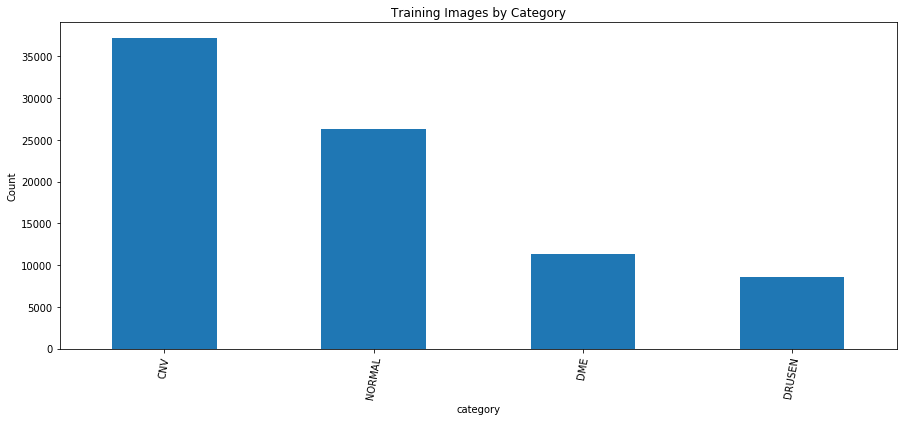

In [18]:
cat_df.set_index('category')['n_train'].plot.bar(figsize=(15, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')
plt.show()

**Distribution of Images Sizes**

The images themselves have vastly different shapes. We can see this by looking at the stats of images sizes by category.

In [19]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()


height                                                           \
            count        mean       std    min    25%    50%    75%    max   
category                                                                     
CNV       37205.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
DME       11348.0  508.208671  6.803761  496.0  512.0  512.0  512.0  512.0   
DRUSEN     8616.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
NORMAL    26315.0  500.132700  7.003275  496.0  496.0  496.0  512.0  512.0   

            width                                                              
            count        mean         std    min    25%    50%    75%     max  
category                                                                       
CNV       37205.0  736.372423  338.497157  384.0  512.0  512.0  768.0  1536.0  
DME       11348.0  564.788157  191.861512  512.0  512.0  512.0  512.0  1536.0  
DRUSEN     8616.0  670.692665  280.842588  512.0  512.0  512.0  768.0  1536.0  
NORMAL    26315.0  659.670606  288.606761  384.0  512.0  512.0  768.0  1536.0

In [20]:
import seaborn as sns

Text(0.5, 1.0, 'Average Size Distribution')

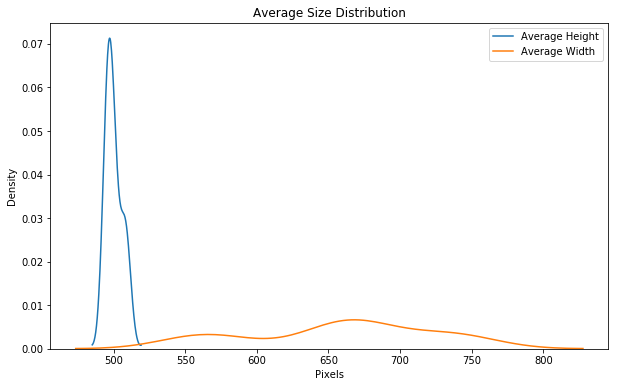

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Total 83,484 OCT images are there in the training dataset. Also 1000 OCT images are there in the test dataset.

It is an imbalanced dataset. Training dataset contains below number of images:


In [22]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

Using TensorFlow backend.


In [23]:
# Model parameters
image_size = 64
batch_size = 32
num_classes = 4
epochs = 30

# **7 layered Model**

In [24]:

model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 256)       7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)      

In [25]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(traindir,target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(traindir,target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(testdir,target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [26]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes),
                                                  train_generator.classes)

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath="/kaggle/output/7layered_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3,verbose = 1,restore_best_weights = True)
callbacks_list = [checkpoint]

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list,
                              class_weight=class_weights)

Epoch 1/30
2087/2087 [==============================] - 322s 154ms/step - loss: 0.8250 - accuracy: 0.7026 - val_loss: 0.8348 - val_accuracy: 0.7925
Epoch 2/30
2087/2087 [==============================] - 317s 152ms/step - loss: 0.5302 - accuracy: 0.8191 - val_loss: 0.3568 - val_accuracy: 0.8595
Epoch 3/30
2087/2087 [==============================] - 317s 152ms/step - loss: 0.4503 - accuracy: 0.8520 - val_loss: 0.9118 - val_accuracy: 0.7190
Epoch 4/30
2087/2087 [==============================] - 317s 152ms/step - loss: 0.3939 - accuracy: 0.8736 - val_loss: 0.2688 - val_accuracy: 0.8583
Epoch 5/30
2087/2087 [==============================] - 317s 152ms/step - loss: 0.3510 - accuracy: 0.8892 - val_loss: 0.1349 - val_accuracy: 0.8818
Epoch 6/30
2087/2087 [==============================] - 319s 153ms/step - loss: 0.3113 - accuracy: 0.9029 - val_loss: 0.4642 - val_accuracy: 0.8930
Epoch 7/30
2087/2087 [==============================] - 317s 152ms/step - loss: 0.1878 - accuracy: 0.9435 - val_

In [29]:
# serialize model to JSON
model_json = model.to_json()
with open("model_balanced_cnn7layered.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Testing Loss:', score[0])
print('Testing accuracy:', score[1])





Testing Loss: 0.12601353228092194
Testing accuracy: 0.9645833373069763


In [31]:
def load_test_data(folder):
    """
    Function to load the images and labels.
    """
    Image = []
    Label = []
    
    for folder_name in os.listdir(folder):
        # Reading the labels.
        if not folder_name.startswith('.'):
            if folder_name in ['CNV']:
                label = 0
            elif folder_name in ['DME']:
                label = 1
            elif folder_name in ['DRUSEN']:
                label = 2
            elif folder_name in ['NORMAL']:
                label = 3
            else:
                label = 4
            for image_file_name in tqdm(os.listdir(folder + folder_name)):
                # Reading the images.
                image_file = cv2.imread(folder + folder_name + '/' + image_file_name)
                if image_file is not None:
                    # Converting images into array.
                    image_file = skimage.transform.resize(image_file, (image_size, image_size, 3))
                    image_array = np.asarray(image_file)
                    Image.append(image_array)
                    Label.append(label)
    Image = np.asarray(Image)
    Label = np.asarray(Label)
    return Image,Label

In [32]:
X_test,Y_test= load_test_data(testdir)

100%|██████████| 242/242 [00:13<00:00, 17.48it/s]


In [33]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory(testdir,target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)

Found 968 images belonging to 4 classes.


In [34]:

pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 968)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [35]:
Y_pred = np.argmax(y_pred,axis = 1)

In [36]:
import pickle
with open('y_pred_baseline_model.pkl','wb') as f:
    pickle.dump(y_pred, f)

In [37]:
print ('Train Accuracy', np.mean(history.history['accuracy']))
print ('Train Loss', np.mean(history.history['loss']))
print ('Validation Accuracy', np.mean(history.history['val_accuracy']))
print ('Validation Loss', np.mean(history.history['val_loss']))

Train Accuracy 0.93774694
Train Loss 0.19379367197289044
Validation Accuracy 0.885020915667216
Validation Loss 0.39679124876856803


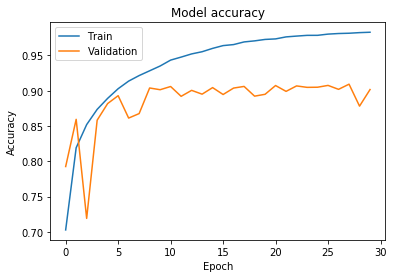

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

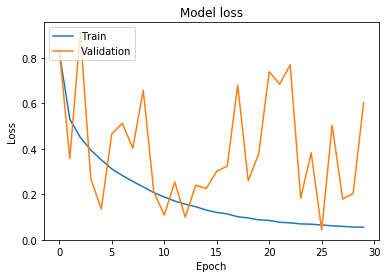

In [39]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[241   1   0   0]
 [  4 235   0   3]
 [ 15   0 227   0]
 [  1   1  10 230]]


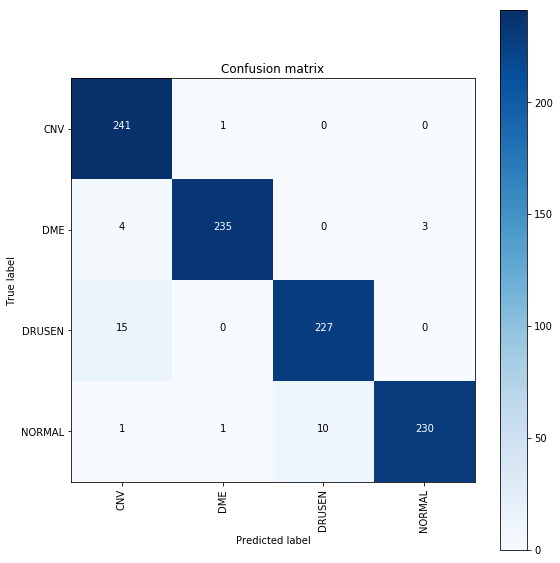

In [41]:
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.92      1.00      0.96       242
         DME       0.99      0.97      0.98       242
      DRUSEN       0.96      0.94      0.95       242
      Normal       0.99      0.95      0.97       242

    accuracy                           0.96       968
   macro avg       0.96      0.96      0.96       968
weighted avg       0.96      0.96      0.96       968



In [43]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity/TPR = {}".format(TPR))

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity/TNR = {}".format(TNR))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision/PPV = {}".format(PPV))

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predict Value = {}".format(NPV))

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate = {}".format(FPR))

# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate = {}".format(FNR))

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate = {}".format(FDR))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy = {}".format(ACC))

Sensitivity/TPR = [0.99586777 0.97107438 0.93801653 0.95041322]
Specificity/TNR = [0.97245179 0.99724518 0.9862259  0.99586777]
Precision/PPV = [0.92337165 0.99156118 0.95780591 0.98712446]
Negative Predict Value = [0.99858557 0.99042408 0.97948016 0.98367347]
False Positive Rate = [0.02754821 0.00275482 0.0137741  0.00413223]
False Negative Rate = [0.00413223 0.02892562 0.06198347 0.04958678]
False discovery rate = [0.07662835 0.00843882 0.04219409 0.01287554]
Overall Accuracy = [0.97830579 0.99070248 0.97417355 0.98450413]
